In [8]:
import pandas as pd
import plotly.express as px
from datetime import datetime
from summer2 import CompartmentalModel
from summer2.parameters import Parameter

In [11]:
analysis_start_date = datetime(2024, 1, 1) 
analysis_end_date = datetime(2024, 7, 1)
epi_model = CompartmentalModel(
    [analysis_start_date, analysis_end_date],
    ['susceptible', 'exposed', 'infectious', 'recovered'],
    ['infectious'],
    ref_date=datetime(2019, 12, 31),
)
epi_model.add_infection_frequency_flow('infection', Parameter('contact_rate'), 'susceptible', 'exposed')
epi_model.add_transition_flow('progression', 1.0 / Parameter('incubation_period'), 'exposed', 'infectious')
epi_model.add_transition_flow('recovery', 1.0 / Parameter('infectious_period'), 'infectious', 'recovered')
epi_model.set_initial_population({'susceptible': 1e10, 'infectious': 1.0})
incidence = epi_model.request_output_for_flow('incidence', 'progression', save_results=False)
epi_model.request_function_output('notifications', incidence * Parameter('detection_prop'));

In [12]:
parameters = {
    'contact_rate': 0.4,
    'incubation_period': 5.0,
    'infectious_period': 5.0,
    'detection_prop': 0.07,
}
epi_model.run(parameters)

<Axes: >

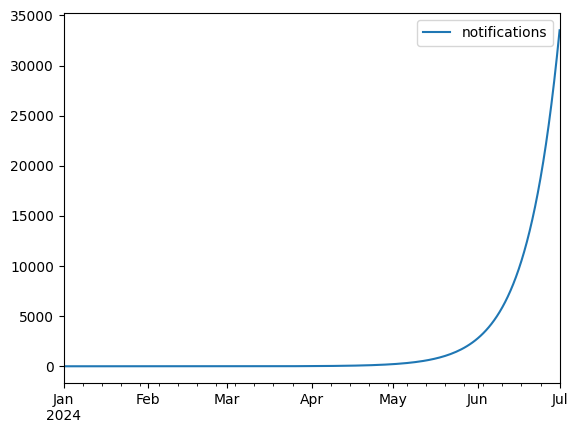

In [13]:
epi_model.get_derived_outputs_df().plot()